## **Author:** ***Magdy El-Rawy***
## **Spark Foundation Internship (GRIP)**
### **Data Science & Business Analytics**

### **Task 2:Prediction using Unsupervised Machine Learning**
In this Project we will explain and apply clustering using unsupervised machine learning.
#### **Kmeans Clustering using Python Scikit-Learn Library** 
In this project we will use Python Scikit-Learn Library for machine learning to implement kmeans clustering algorithm.
#### **Task Statement:** 
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [2]:
#Importing Necessary Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib inline

## Load the data

In [3]:
#Loading The Iris Dataset
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Explore

In [5]:
iris_df.shape

(150, 6)

In [6]:
# print(iris_df["SepalLengthCm"].nunique())
# print(iris_df["SepalWidthCm"].nunique())
# print(iris_df["PetalLengthCm"].nunique())
# print(iris_df["PetalWidthCm"].nunique())
# print(iris_df["Species"].nunique())

Because we don't need the Id column in our clustering process so we are gonna drop it.

In [7]:
iris_df.drop(columns="Id", inplace=True)
print(iris_df.shape)
iris_df.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Well, from the information above we see that there's no null data and data types are all correct 

Species means type or breed so that will be our target or result

In [23]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Because we don't know the number of clusters in advance, we will use the elbow method to determine the best number of clusters.

## Plot the data

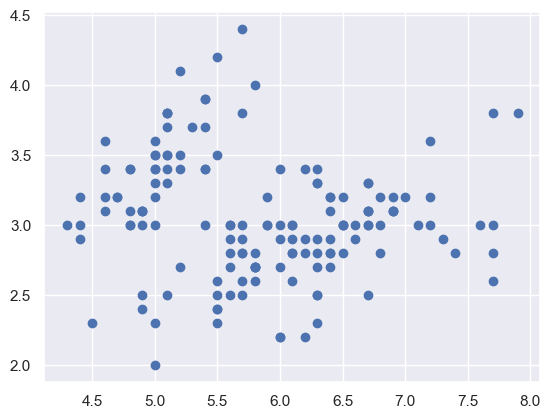

In [10]:
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm']);

## Select the features

In [11]:
X = iris_df.iloc[:, 0:4].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Finding the optimum number of clusters(K)
To find the optimum of clusters, we're gonna use the elbow method

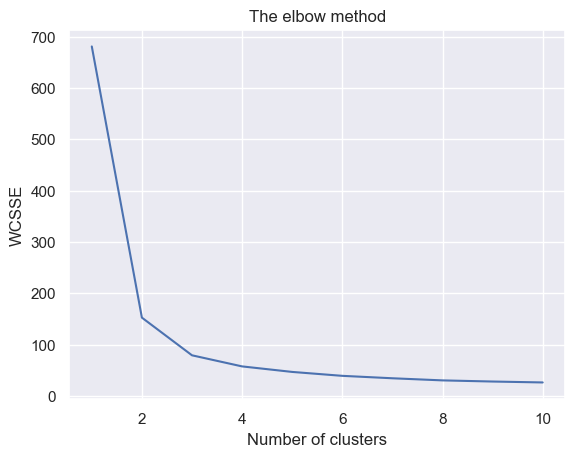

In [14]:
import warnings
warnings.filterwarnings("ignore")

# Within cluster sum of square errors
wcsse = []
#Elbow method to frind the optimum number of clusters
def elbow(X):
    wss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)
    return wss
wcsse = elbow(X)
#Plotting and visualizing the results
plt.plot(range(1,11), wcsse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSSE') 
plt.show()

As we see from the plotting above, we see that there's a noticeable change at the number (3) in WCSSE (Here's the elbow), That's the optimum number of clusters

## Clustering results

In [20]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
# The algorithm result
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [16]:
data_with_clusters = iris_df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


## Plot the results

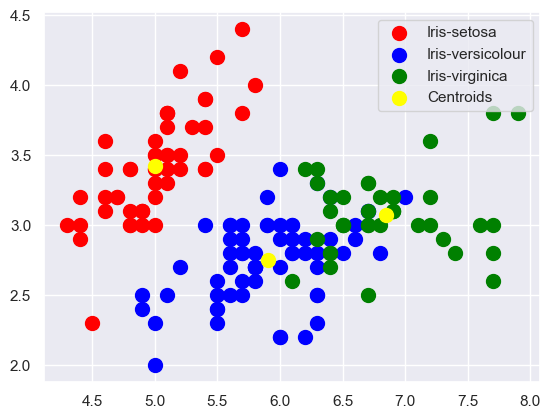

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();